In [1]:
#!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
train_dir = "/kaggle/input/grocery-store-dataset/GroceryStoreDataset/dataset/train"
test_dir = "/kaggle/input/grocery-store-dataset/GroceryStoreDataset/dataset/test"
valid_dir = "/kaggle/input/grocery-store-dataset/GroceryStoreDataset/dataset/val"

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator, 
    (tf.float32, tf.float32), 
    (
        tf.TensorShape([None, 150, 150, 3]),
        tf.TensorShape([None, 3])
    )
)

train_dataset = train_dataset.repeat()

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')
test_dataset = tf.data.Dataset.from_generator(
    lambda: test_generator, 
    (tf.float32, tf.float32), 
    (
        tf.TensorShape([None, 150, 150, 3]),
        tf.TensorShape([None, 3])
    )
)

test_dataset = test_dataset.repeat()

valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')
valid_dataset = tf.data.Dataset.from_generator(
    lambda: valid_generator, 
    (tf.float32, tf.float32), 
    (
        tf.TensorShape([None, 150, 150, 3]),
        tf.TensorShape([None, 3])
    )
)

valid_dataset = valid_dataset.repeat()

Found 2640 images belonging to 3 classes.
Found 2485 images belonging to 3 classes.
Found 296 images belonging to 3 classes.


In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [8]:
history = model.fit(train_dataset, steps_per_epoch=50, epochs=10, validation_data=valid_dataset, validation_steps=50)
print(history.history.keys())

Epoch 1/10
50/50 [==============================] - 41s 804ms/step - loss: 0.9205 - accuracy: 0.5544 - val_loss: 0.9016 - val_accuracy: 0.5608
Epoch 2/10
50/50 [==============================] - 39s 774ms/step - loss: 0.7112 - accuracy: 0.6793 - val_loss: 0.8474 - val_accuracy: 0.6412
Epoch 3/10
50/50 [==============================] - 39s 778ms/step - loss: 0.6262 - accuracy: 0.7219 - val_loss: 0.9558 - val_accuracy: 0.6291
Epoch 4/10
50/50 [==============================] - 39s 781ms/step - loss: 0.6233 - accuracy: 0.7172 - val_loss: 0.8170 - val_accuracy: 0.6412
Epoch 5/10
50/50 [==============================] - 39s 785ms/step - loss: 0.5539 - accuracy: 0.7399 - val_loss: 0.8699 - val_accuracy: 0.6601
Epoch 6/10
50/50 [==============================] - 39s 784ms/step - loss: 0.5033 - accuracy: 0.7669 - val_loss: 0.7603 - val_accuracy: 0.6770
Epoch 7/10
50/50 [==============================] - 39s 779ms/step - loss: 0.4215 - accuracy: 0.8176 - val_loss: 0.8288 - val_accuracy: 0.6385

In [9]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
print(val_acc)

[0.5608108043670654, 0.6412162184715271, 0.629054069519043, 0.6412162184715271, 0.6601351499557495, 0.6770270466804504, 0.6385135054588318, 0.7222973108291626, 0.7283783555030823, 0.7439188957214355]


In [10]:
score = model.evaluate(test_generator, steps=50)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

50/50 [==============================] - 12s 240ms/step - loss: 0.4259 - accuracy: 0.8012
Test loss: 0.4258544147014618
Test accuracy: 0.8012499809265137


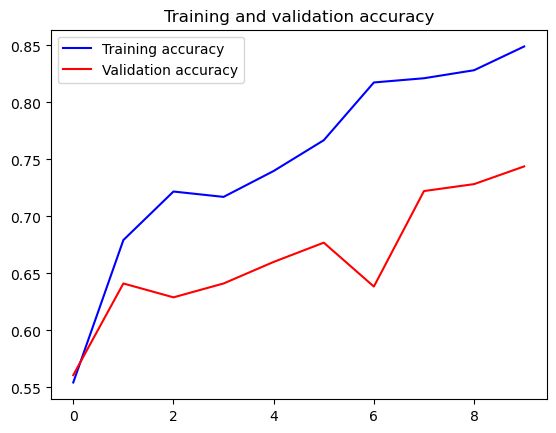

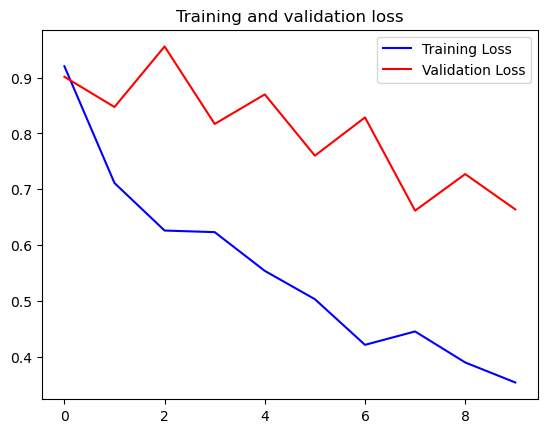

In [11]:
import matplotlib.pyplot as plt
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
model.save('grocery_store_model.h5')